In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import json
import pandas as pd
from pandas.io.json import json_normalize
# author: jsara72
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import random
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk import word_tokenize
import pandas as pd
import re
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
import numpy as np

In [255]:
def griffin():
    
    order = ['id','time','text','language','retweeted','retweet counts','']
    
    idt = re.compile("id:.*?created_at:")
    idt_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[3:-13]), idt.findall(f.read())))
    
    f.seek(0)
    time = re.compile("created_at:.*?text:")
    time_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[11:-7]), time.findall(f.read())))
    
    f.seek(0)

    text = re.compile("text:.*?lang:",re.DOTALL)
    text_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[5:-7]), text.findall(f.read())))
    
    
    f.seek(0)
    length = re.compile("lang:.*?source:")
    length_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[5:-9]), length.findall(f.read())))
    
    f.seek(0)
    retweeted = re.compile("retweeted:.*?retweet_count:")
    retweeted_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[10:-16]), retweeted.findall(f.read())))
    
    f.seek(0)
    retweet_counts = re.compile("retweet_counts:.*")
    retweet_counts_temp = list(map(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x[14:-1]), retweet_counts.findall(f.read())))
    
    #print(len(idt_temp),len(time_temp),len(text_temp),len(length_temp),len(retweeted_temp),len(retweet_counts_temp))
    
    df = pd.DataFrame({order[0]: idt_temp,
                        order[1]: time_temp,
                        order[2]: text_temp,
                        order[3]: length_temp,
                       order[4]: retweeted_temp})
    #                  order[5]: retweet_counts_temp})
    return df

In [256]:
f = open("part-00000") # 36726 tweets in this file

In [257]:
df = griffin()

In [258]:
df.head()

,id,language,retweeted,text,time
0,822707826460073985,en,false,A guy who is so excited to draw a uterus on a ...,Sat Jan 21 07:30:05 +0000 2017
1,822707847440035840,en,false,@womensmarchlon Sorry I can't be there today. ...,Sat Jan 21 07:30:10 +0000 2017
2,822707893581578240,en,false,Worldwide Womens March kicks off in New Zea...,Sat Jan 21 07:30:21 +0000 2017
3,822707927140052992,ja,false,RT @channel__3: 2000 #WomensMarch \nhttps://t...,Sat Jan 21 07:30:29 +0000 2017
4,822707943938420736,en,false,RT @politicalmiller: While Trump's #Inaugurati...,Sat Jan 21 07:30:33 +0000 2017


In [259]:
#open file with the rest of our tweets
#f = open("part-00000")

In [260]:
#add them to our dataset
#df_secondhalf = griffin()
#df_tot = pd.concat([df, df_secondhalf])

In [261]:
d = df.duplicated(['id'])
df['duplicate_user'] = d
#appends a new column that tells us if this tweet is by a new user
# with no other tweets in our dataset

In [262]:
df2 = df.loc[lambda df: df['duplicate_user'] == 0]
#new dataframe with only tweets by users who haven't tweeted yet

In [263]:
df3 = df.loc[lambda df: df['duplicate_user'] == 1]
#new dataframe with only tweets from users who tweeted before

In [264]:
print(len(df))
print(len(df2))
print(len(df3))

36726
36650
76


In [265]:
df.head()

,id,language,retweeted,text,time,duplicate_user
0,822707826460073985,en,false,A guy who is so excited to draw a uterus on a ...,Sat Jan 21 07:30:05 +0000 2017,False
1,822707847440035840,en,false,@womensmarchlon Sorry I can't be there today. ...,Sat Jan 21 07:30:10 +0000 2017,False
2,822707893581578240,en,false,Worldwide Womens March kicks off in New Zea...,Sat Jan 21 07:30:21 +0000 2017,False
3,822707927140052992,ja,false,RT @channel__3: 2000 #WomensMarch \nhttps://t...,Sat Jan 21 07:30:29 +0000 2017,False
4,822707943938420736,en,false,RT @politicalmiller: While Trump's #Inaugurati...,Sat Jan 21 07:30:33 +0000 2017,False


In [173]:
#changing format of 'time' column to datetime and putting into
# 3 minute bins so we can make a histogram of tweets vs. time
aaa = df['time']
times_df = pd.to_datetime(aaa)
series = pd.Series(1, index=times_df)
times_df_3minbins = series.resample('3T').sum()

bbb = df2['time']
times_df2 = pd.to_datetime(bbb)
series2 = pd.Series(1, index=times_df2)
times_df2_3minbins = series2.resample('3T').sum()

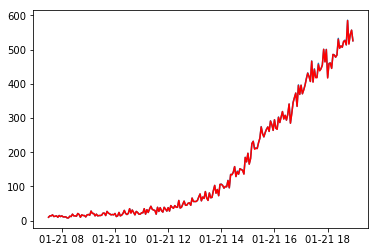

In [174]:
#plotting # all tweets vs time (p1, blue) and # tweets from new users
# vs time (p2, red)
p1 = plt.plot(times_df_3minbins)
p2 = plt.plot(times_df2_3minbins, 'r')

In [266]:
df.loc[lambda df: df['id'] == '822778777335984128']

,id,language,retweeted,text,time,duplicate_user
1965,822778777335984128,en,false,"RT @katyperry: Then, I'm marching. #WomensMarch",Sat Jan 21 12:12:01 +0000 2017,False
1968,822778777335984128,en,false,"RT @katyperry: Then, I'm marching. #WomensMarch",Sat Jan 21 12:12:01 +0000 2017,True


In [267]:
test1 = df.loc[lambda df: df['retweeted'] == 'false']
print('# not retweeted =')
print(len(test1))
test2 = df.loc[lambda df: df['retweeted'] == 'true']
print('# retweeted = ') 
print(len(test2))

# not retweeted =
36726
# retweeted = 
0


In [269]:
nltk.FreqDist(df['']).most_common(20)

In [270]:
def get_filtered_tokens(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w.lower() for w in tokens if not w.lower() in stop_words and not w.lower() in [':',"#", '@', 'https', ';','&', ',']]
    print(nltk.FreqDist(filtered_tokens).most_common(200))
   #return filtered_tokens

In [271]:
appended_text = ''
for t in df['text']:
    appended_text += t

In [272]:
get_filtered_tokens(appended_text)

[('womensmarch', 21586), ('.', 19540), ('rt', 9745), ('!', 8958), ('women', 8407), ('march', 7875), ("'s", 7802), ('today', 3827), ('marching', 3233), ('``', 2726), ("''", 2654), ('trump', 2583), ('?', 2261), ('people', 1980), ("n't", 1975), ('washington', 1915), ('amp', 1689), ('-', 1672), ('rights', 1638), ("'re", 1536), ('de', 1490), ('dc', 1378), ("'m", 1285), ('...', 1273), ('love', 1241), ('womensmarchrt', 1199), ('womensmarchonwashington', 1178), ('world', 1167), ('la', 1155), ('inauguration', 1038), ('protest', 1035), ('proud', 1035), ('womensmarchlondon', 1022), ('live', 981), ('us', 971), ('like', 960), ('cnn', 934), ('america', 915), ('go', 894), ('hillaryclinton', 876), ('que', 840), ('crowd', 833), ('marches', 829), (')', 822), ('believe', 822), ('(', 819), ('woman', 797), ('en', 788), ('around', 766), ('right', 742), ('whyimarch', 741), ('london', 740), ('standing', 727), ('day', 714), ('solidarity', 677), ('everyone', 675), ('thanks', 675), ('important', 665), ('sign', 6